In [55]:
# Imports for project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# Dataset
path= "bank-full.csv"

dataframe = pd.read_csv((path), delimiter=';', quotechar='"')

In [5]:
dataframe.describe() # for numerical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Finding all the features and categories included
for column in dataframe.columns:
    if dataframe[column].dtype == 'object' or dataframe[column].dtype == 'int64':
        print(f"Feature: {column}")
        print(f"Data Type: {dataframe[column].dtype}")
        
        if dataframe[column].dtype == 'object':  # Check for categorical features
            print(f"Categories: {dataframe[column].unique()}")
        
        print("-" * 50)


Feature: age
Data Type: int64
--------------------------------------------------
Feature: job
Data Type: object
Categories: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Feature: marital
Data Type: object
Categories: ['married' 'single' 'divorced']
--------------------------------------------------
Feature: education
Data Type: object
Categories: ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Feature: default
Data Type: object
Categories: ['no' 'yes']
--------------------------------------------------
Feature: balance
Data Type: int64
--------------------------------------------------
Feature: housing
Data Type: object
Categories: ['yes' 'no']
--------------------------------------------------
Feature: loan
Data Type: object
Categories: ['no' 'yes']
------------------------------------

**Exploring and preparing the dataset for model implementation**

* Find Unwanted columns
* find missing values
* Explore categorical feature
* relation between categorical features and label
* Find continous features
* find outliers in numerical features
* Check the balance of the dataset based on target values in classification



In [7]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
missing_values = dataframe.isnull().sum()

# Filter columns with missing values
features_na = missing_values[missing_values > 0]

# If there are missing values
if not features_na.empty:
    for feature, count in features_na.items():
        missing_percentage = np.round(count / len(df) * 100, 4)
        print(f"{feature}: {missing_percentage} % missing values")
else:
    print("No missing values")

No missing values


In [9]:
for column in dataframe.columns:
    if dataframe[column].dtype == 'object': # Check for categorical features
        num_categories = len(dataframe[column].unique()) 
        print(f"Feature: {column}")
        print(f"Number of Categories: {num_categories}")
        print("-" * 50)


Feature: job
Number of Categories: 12
--------------------------------------------------
Feature: marital
Number of Categories: 3
--------------------------------------------------
Feature: education
Number of Categories: 4
--------------------------------------------------
Feature: default
Number of Categories: 2
--------------------------------------------------
Feature: housing
Number of Categories: 2
--------------------------------------------------
Feature: loan
Number of Categories: 2
--------------------------------------------------
Feature: contact
Number of Categories: 3
--------------------------------------------------
Feature: month
Number of Categories: 12
--------------------------------------------------
Feature: poutcome
Number of Categories: 4
--------------------------------------------------
Feature: y
Number of Categories: 2
--------------------------------------------------


In [10]:
continuous_features = [column for column in dataframe.columns if dataframe[column].dtype in ['int64', 'float64']]

# Print the continuous features
print("Continuous Features:")
for feature in continuous_features:
    print(feature)

Continuous Features:
age
balance
day
duration
campaign
pdays
previous


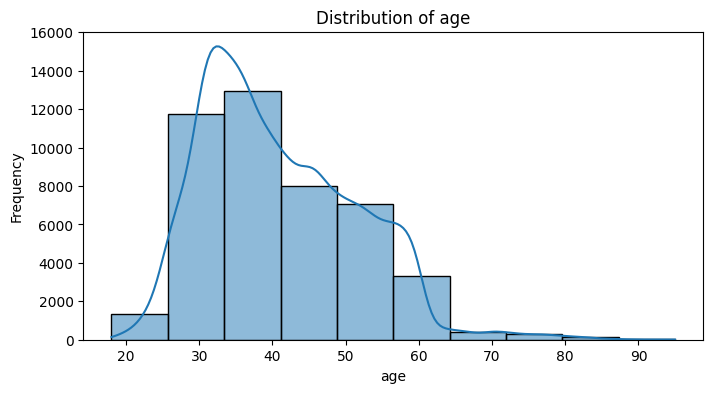

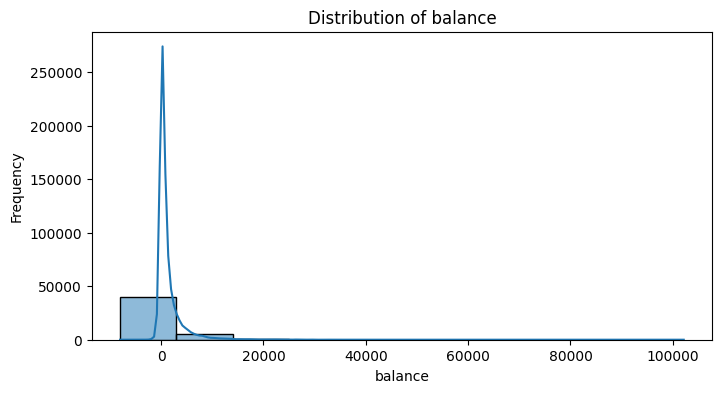

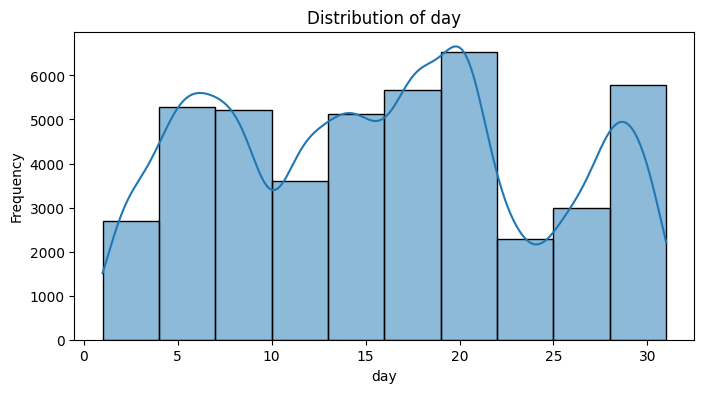

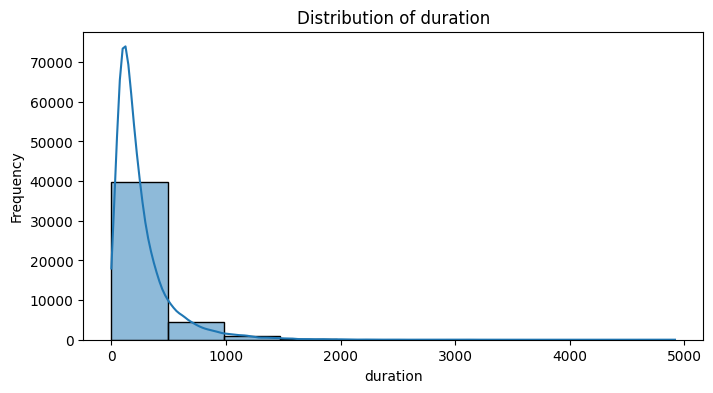

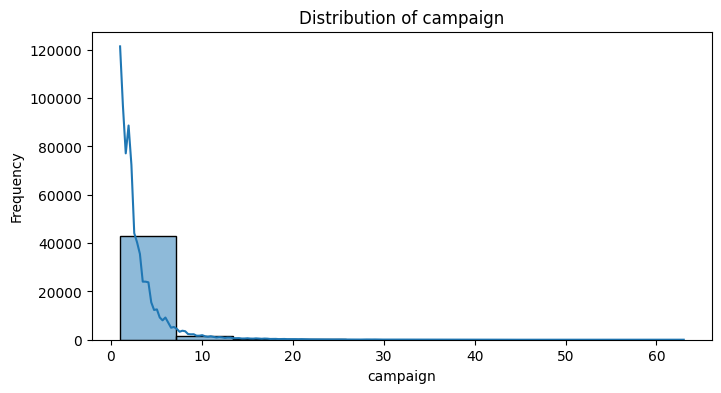

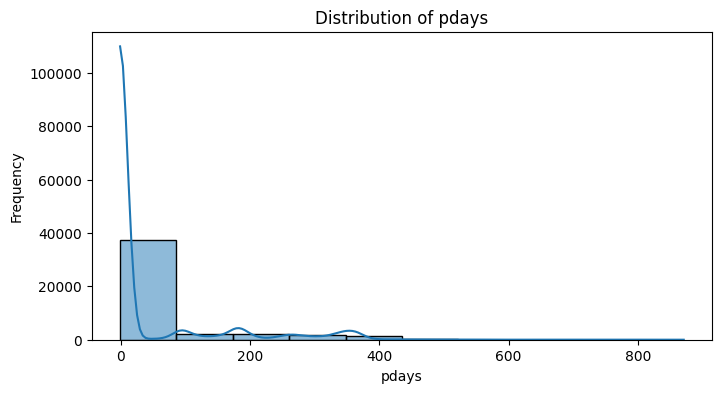

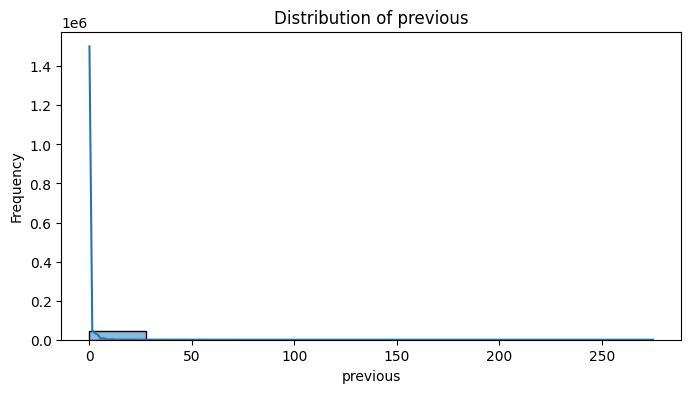

In [11]:
# plot to see spread of data
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

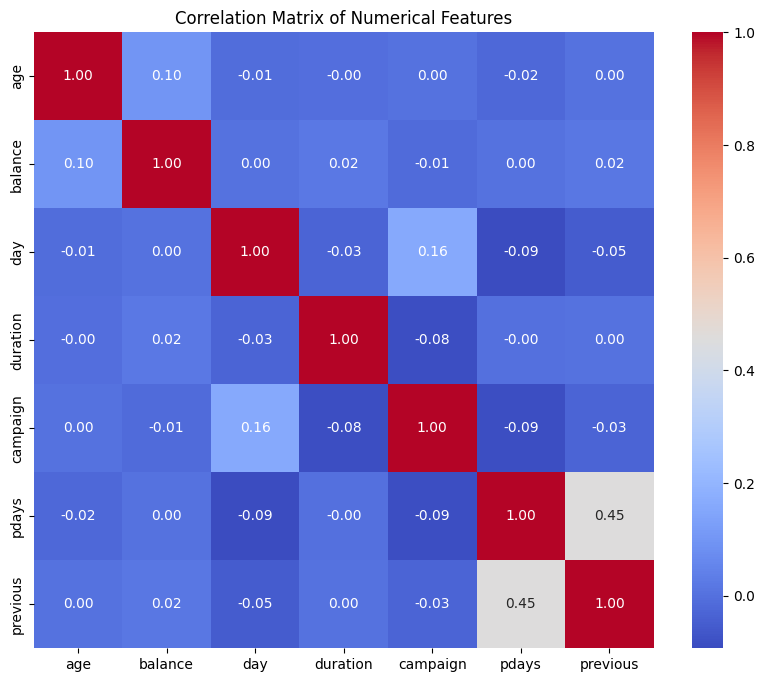

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

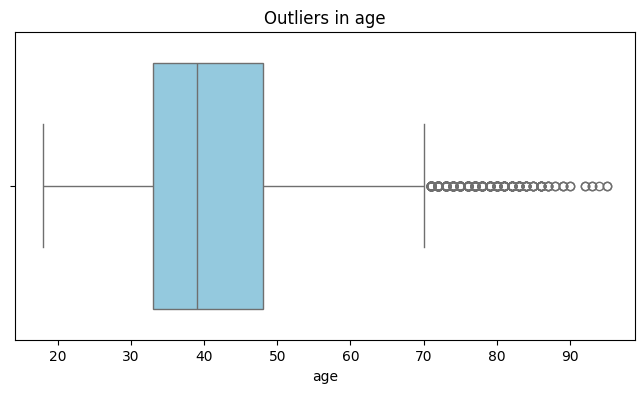

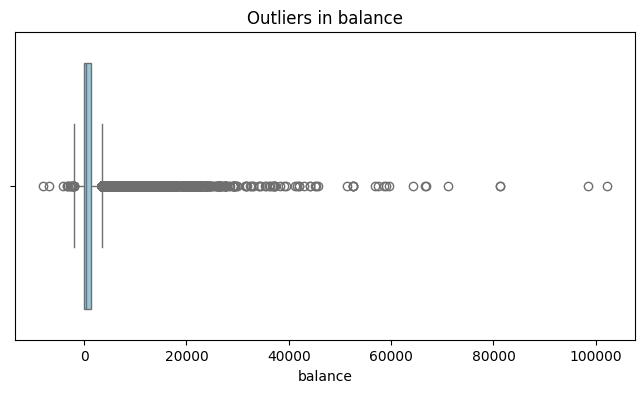

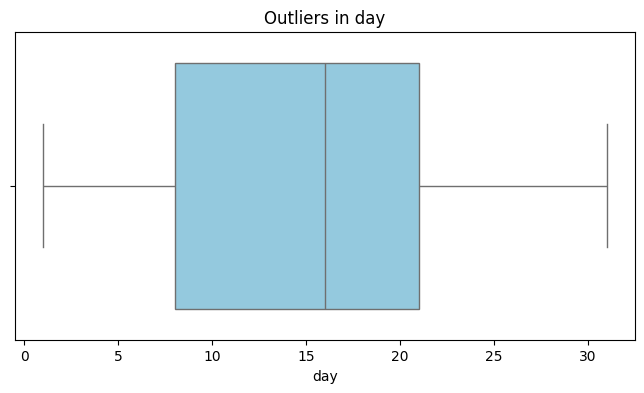

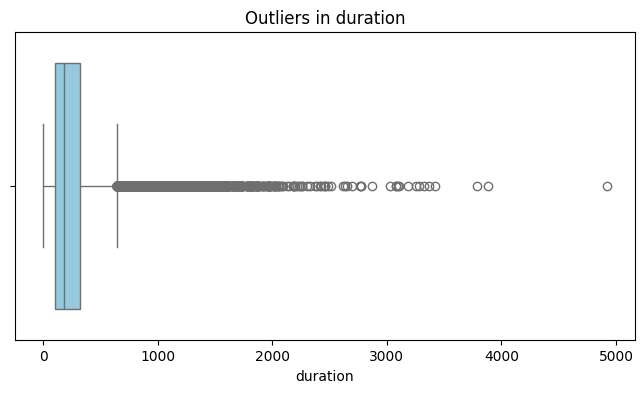

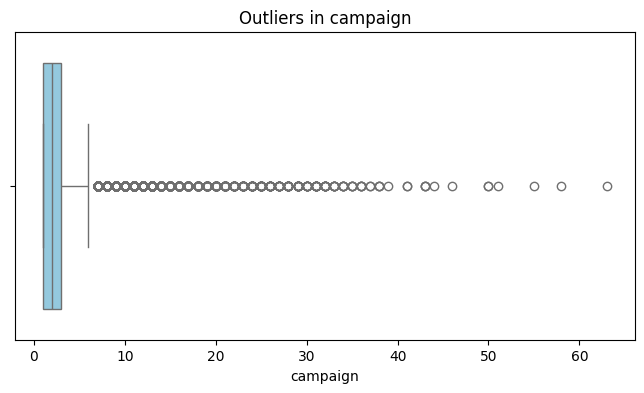

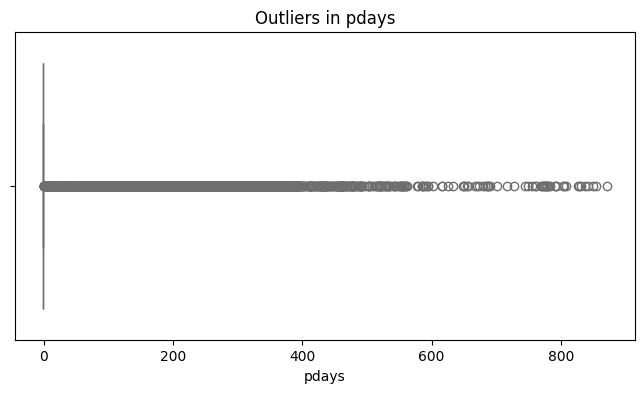

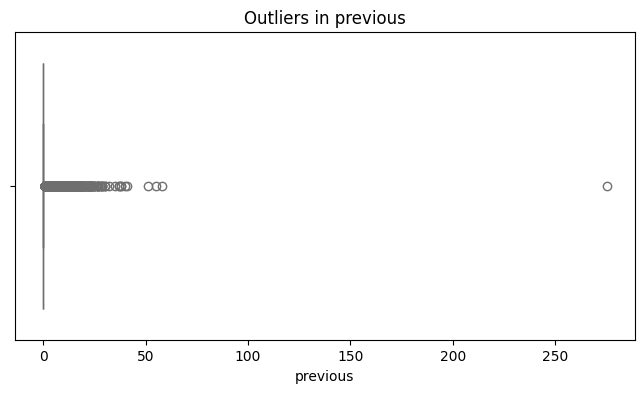

Outliers for age: []
Outliers for balance: []
Outliers for day: []
Outliers for duration: []
Outliers for campaign: []
Outliers for pdays: []
Outliers for previous: []


In [13]:
outliers_dict = {}

# Loop through each feature
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    boxplot = sns.boxplot(x=dataframe[feature], color='skyblue')
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()
    
    # Extract outliers from the boxplot
    # Access the outlier points from the boxplot
    outliers = [point.get_xdata()[0] for point in boxplot.artists if isinstance(point, plt.Line2D)]

    
    # Save the outliers in the dictionary
    outliers_dict[feature] = outliers

# Display the outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Outliers for {feature}: {outliers}")


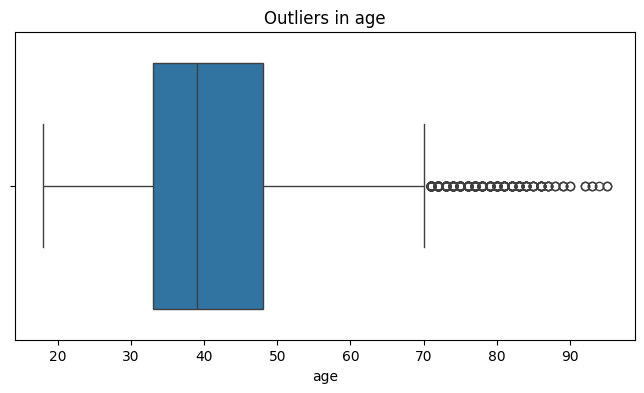

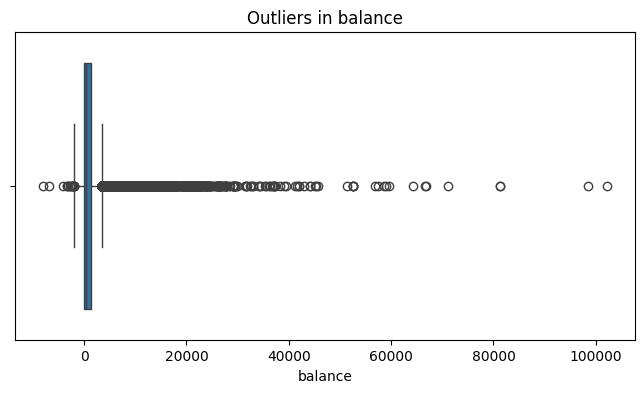

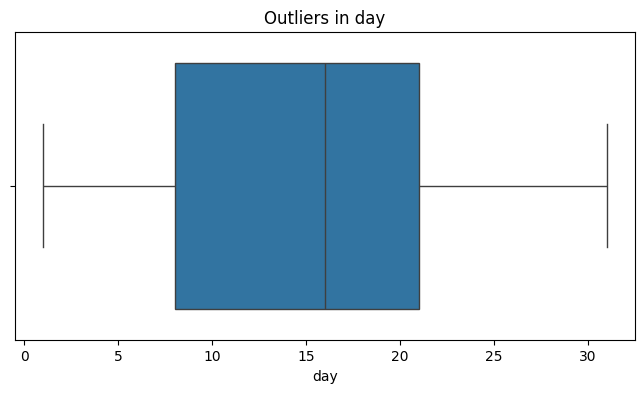

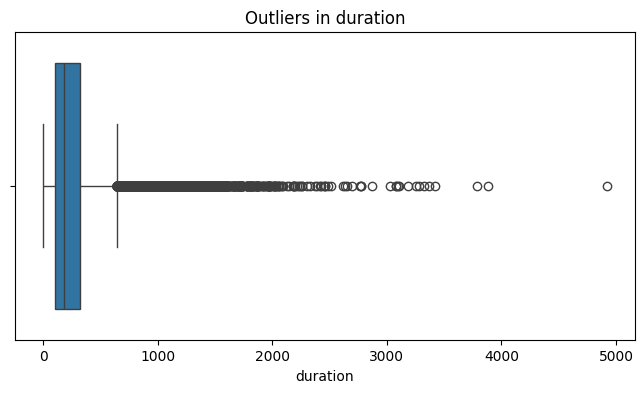

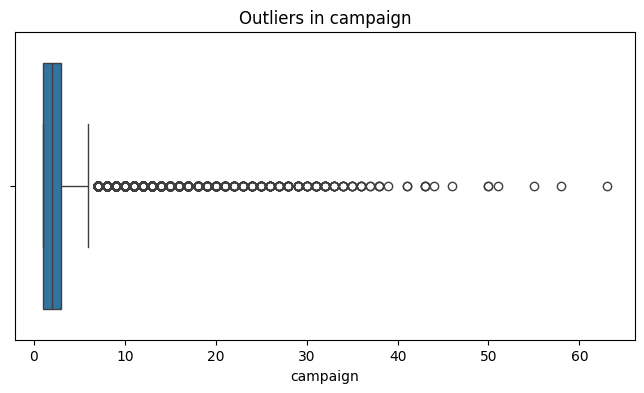

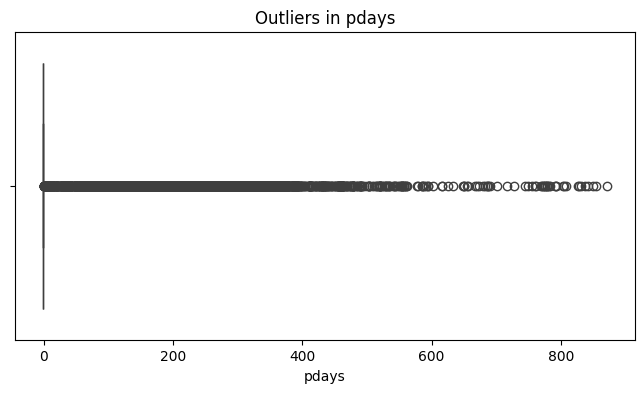

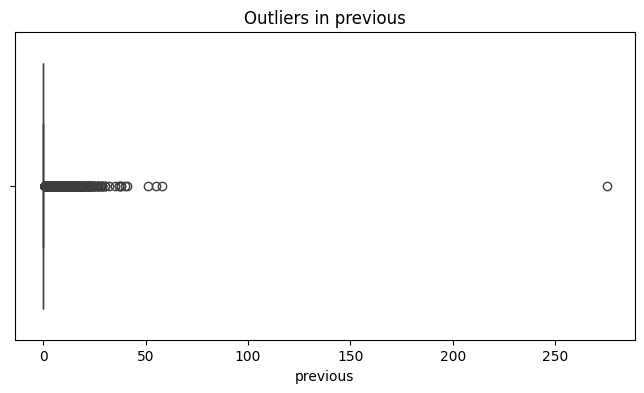

In [14]:
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataframe[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

The data set consists of: 

9 categorical features
no missing values
outliers within dataset in numerical (continuous features); age, balance, duration, pdays, previous campaign


Problem statement: Classification problem, where two models (random forest and CNN) must be trained to predict if a client will subscribe a term deposit based on the data. 

Feature engineering: 

Feature Selection: Remove irrelevant/redundant features.
Feature Transformation: Normalize/standardize numerical features.
Encoding Categorical Variables:
One-hot encoding for nominal categories.
Label encoding for ordinal categories.

Split Data:

Split the dataset into:
Training set
Validation set ( for hyperparameter tuning).
Test set


In [40]:
# Duplicate dataset to trim and prepare for model implementation

df = dataframe.copy()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
df.shape

(45211, 17)

trimming the unwanted features in a dataset requires attention to the range of values affecting it via features.

In [42]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

The target feature being "y" for the problem. grouping by the other features allows us to understand the size of the feature affecting. This process will be repeated for other features as well.

In [43]:
df.drop(['default'],axis=1,inplace=True)

In [44]:
df.groupby(['y','previous']).size()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Length: 66, dtype: int64

In [45]:
df.drop(['previous'],axis=1,inplace=True)

In [46]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [47]:
df.drop(['pdays'],axis=1,inplace=True)

To accurately classify whether a customer would infact use the services, attributes that prove highly correlated and redundant should be trimmed as well. Duration is one such feature.

In [48]:
df.drop(['duration'],axis=1,inplace=True)

Removing outliers within the data set to maintain accuracy

In [49]:
def find_outlier_indices(df, columns):
    outlier_indices = set()
    for column in columns:
        if column in df.select_dtypes(include=['float64', 'int64']).columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"Feature: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            # Find indices of rows where the column values are outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outlier_indices.update(outliers)
    
    return list(outlier_indices)

# Specify the features to analyze for outliers
features_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Find outlier indices
outlier_indices = find_outlier_indices(df, features_to_check)
print(f"Total outliers found: {len(outlier_indices)}")

# Remove outliers
data_cleaned = df.drop(index=outlier_indices)

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Feature: age, Lower Bound: 10.5, Upper Bound: 70.5
Feature: balance, Lower Bound: -1962.0, Upper Bound: 3462.0
Feature: campaign, Lower Bound: -2.0, Upper Bound: 6.0
Total outliers found: 7860
Original dataset shape: (45211, 13)
Cleaned dataset shape: (37351, 13)


In [50]:
cleaned_numerical = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]
print(cleaned_numerical)


['age', 'balance', 'day', 'campaign']


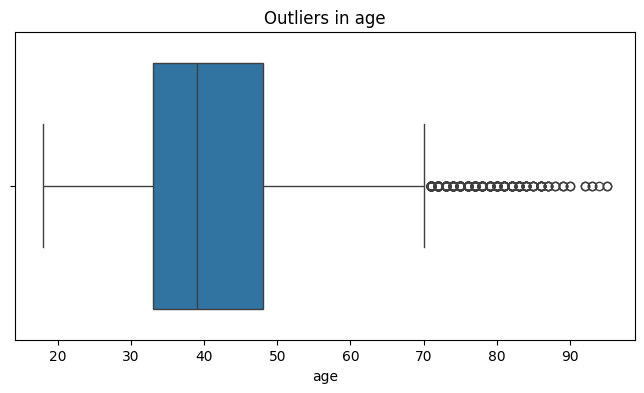

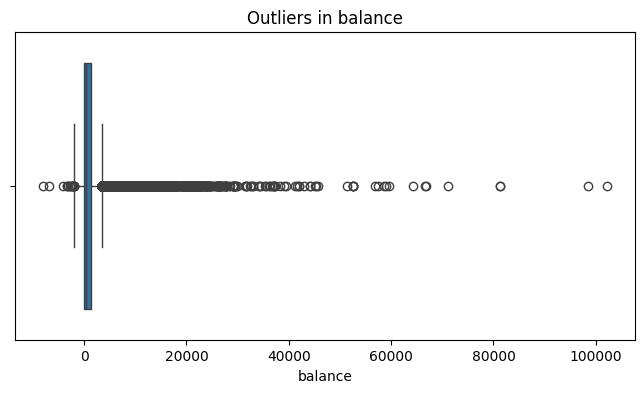

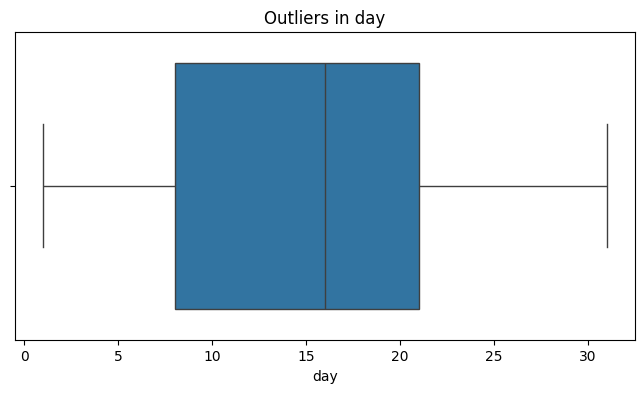

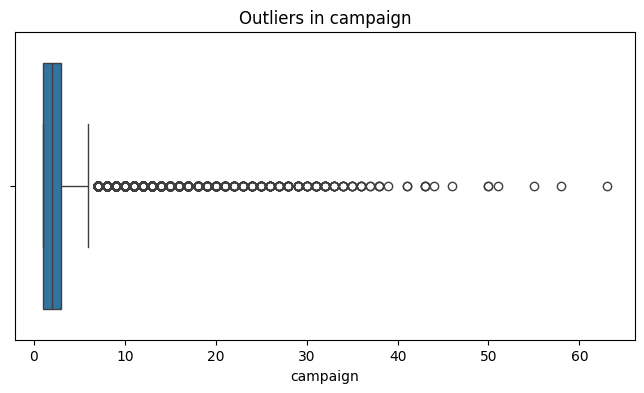

In [51]:
for feature in cleaned_numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

Random forest implementation

In [52]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':  # Target column
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target column
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[11782   195]
 [ 1255   332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.63      0.21      0.31      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564


Accuracy Score:
0.8930993807136538


In [30]:
f1 = f1_score(y_test, y_pred)
print("\nF1 Score:")


F1 Score:


c:\Users\msmam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
